In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!cp /content/drive/MyDrive/NSL-KDD.arff NSL-KDD.arff 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
with open('NSL-KDD.arff', 'r') as file:
    lines = file.readlines()

data_lists = []
for line in lines:
    line = line.strip()
    line_list = line.split(',')
    data_lists.append(line_list)

In [4]:
print(data_lists[0])

['0', 'tcp', 'ftp_data', 'SF', '491', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '2', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '150', '25', '0.17', '0.03', '0.17', '0.00', '0.00', '0.00', '0.05', '0.00', 'normal']


In [5]:
# Column names
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
           'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
           'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'class']

df = pd.DataFrame(data_lists, columns=columns)

# Convert columns to numeric
numeric_columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
                   'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
                   'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                   'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                   'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                   'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                   'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                   'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [6]:
df['class'] = df['class'].replace({'normal': 0, 'anomaly': 1})
df['class'] = pd.to_numeric(df['class'])

In [7]:
df = df.drop(['protocol_type', 'service', 'flag'], axis=1)

In [8]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

In [10]:
# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

In [11]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [12]:
# Backpropagation
bp_model = MLPClassifier()
bp_model.fit(X_train, y_train)
bp_pred = bp_model.predict(X_test)
bp_accuracy = accuracy_score(y_test, bp_pred)

In [13]:
# Support Vector Machine Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_classification_report = classification_report(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_classification_report = classification_report(y_test, nb_pred)
nb_roc_auc = roc_auc_score(y_test, nb_pred)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_classification_report = classification_report(y_test, knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn_pred)

bp_accuracy = accuracy_score(y_test, bp_pred)
bp_precision = precision_score(y_test, bp_pred)
bp_recall = recall_score(y_test, bp_pred)
bp_classification_report = classification_report(y_test, bp_pred)
bp_roc_auc = roc_auc_score(y_test, bp_pred)


In [15]:
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred)

In [16]:
metrics = {
    'Decision Tree': {'Accuracy': dt_accuracy, 'Precision': dt_precision, 'Recall': dt_recall, 'ROC AUC': dt_roc_auc, 'Classification Report': dt_classification_report},
    'Naive Bayes': {'Accuracy': nb_accuracy, 'Precision': nb_precision, 'Recall': nb_recall, 'ROC AUC': nb_roc_auc, 'Classification Report': nb_classification_report},
    'K-Nearest Neighbors': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'ROC AUC': knn_roc_auc, 'Classification Report': knn_classification_report},
    'Backpropagation': {'Accuracy': bp_accuracy, 'Precision': bp_precision, 'Recall': bp_recall, 'ROC AUC': bp_roc_auc, 'Classification Report': bp_classification_report},
    'SVM': {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall, 'ROC AUC': svm_roc_auc, 'Classification Report': svm_classification_report}
}

print("Metrics Comparison:")
for model, metrics_dict in metrics.items():
    print("-------------------------------------------------------")
    print(f"Model: {model}")
    print(f"Accuracy: {metrics_dict['Accuracy']}")
    print(f"Precision: {metrics_dict['Precision']}")
    print(f"Recall: {metrics_dict['Recall']}")
    print(f"ROC AUC: {metrics_dict['ROC AUC']}")
    print(f"Classification Report:\n{metrics_dict['Classification Report']}\n")


Metrics Comparison:
-------------------------------------------------------
Model: Decision Tree
Accuracy: 0.9974995038698155
Precision: 0.9981282967500426
Recall: 0.9965174551940882
ROC AUC: 0.9974391776044944
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


-------------------------------------------------------
Model: Naive Bayes
Accuracy: 0.5324072236554872
Precision: 0.4904306220095694
Recall: 0.01741272402955916
ROC AUC: 0.5007716279960045
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.98      0.69     13422
           1       0.49      0.02      0.03     11773

    accuracy                           0.53     25195
   macr

In [19]:
from sklearn.metrics import confusion_matrix
#dt nb knn bp

cm_dt = confusion_matrix(y_test, dt_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
cm_knn = confusion_matrix(y_test, knn_pred)
cm_bp = confusion_matrix(y_test, bp_pred)
cm_svm = confusion_matrix(y_test, svm_pred)

cm_dt_df = pd.DataFrame(cm_dt, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_nb_df = pd.DataFrame(cm_nb, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_knn_df = pd.DataFrame(cm_knn, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_bp_df = pd.DataFrame(cm_bp, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_svm_df = pd.DataFrame(cm_svm, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])

print("Confusion Matrix for each model:")
print("---------------------------\nDT:")
print(cm_dt_df)
print("---------------------------\nNB:")
print(cm_nb_df)
print("---------------------------\nKNN:")
print(cm_knn_df)
print("---------------------------\nBP:")
print(cm_bp_df)
print("---------------------------\nBP:")
print(cm_svm_df)


Confusion Matrix for each model:
---------------------------
DT:
        Predicted 0  Predicted 1
True 0        13400           22
True 1           41        11732
---------------------------
NB:
        Predicted 0  Predicted 1
True 0        13209          213
True 1        11568          205
---------------------------
KNN:
        Predicted 0  Predicted 1
True 0        13341           81
True 1           42        11731
---------------------------
BP:
        Predicted 0  Predicted 1
True 0        13046          376
True 1          756        11017
---------------------------
BP:
        Predicted 0  Predicted 1
True 0        13420            2
True 1        11754           19


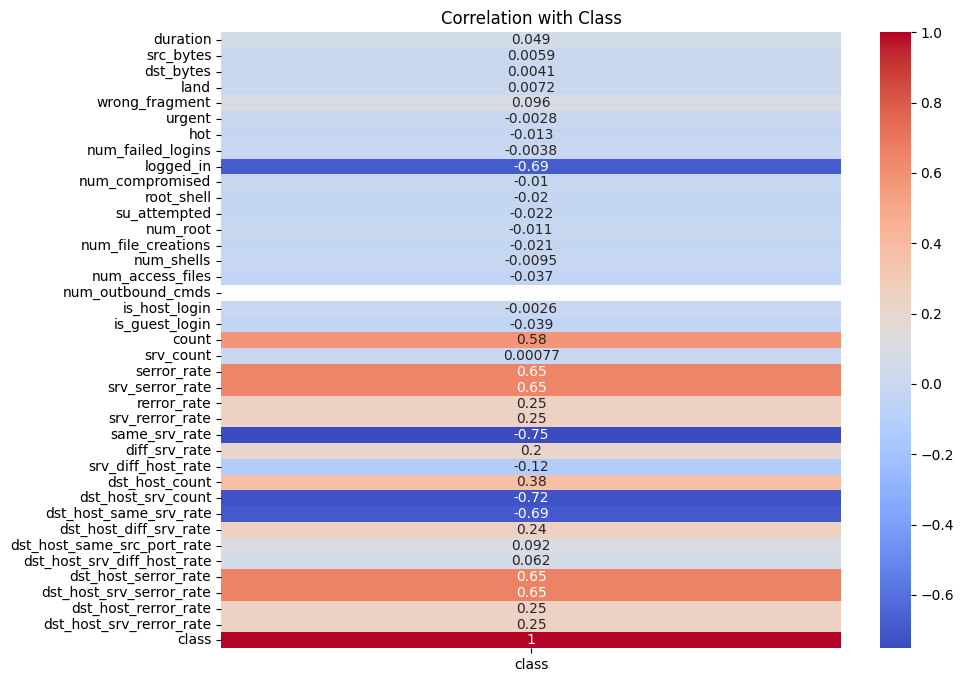

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()[['class']]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation with Class')
plt.show()